In [378]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar los datos
data = pd.read_csv("dataframe/champions.csv")

# Eliminar columnas irrelevantes
data = data.drop(['idPartido', 'Ronda', 'Temporada', 'Evento', 'GolesLocal', 'GolesVisitante'], axis=1)
data.head()

# Separar características y etiquetas
X = data.drop(['VictoriaLocal', 'Empate', 'VictoriaVisitante'], axis=1)
y = data[['VictoriaLocal', 'Empate', 'VictoriaVisitante']]

# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [379]:
X

,Local,Visitante,%_Victorias_Local,%_Empate,%_Victoria_Visitante,%_Equipo1_Ganado,%_Equipo2_Ganado,%_1_G_Temporada,%_1_G_Temporada_L,%_1_E_Temporada_L,...,1_MediaJugadores,%_2_G_Temporada,%_2_G_Temporada_L,%_2_E_Temporada_L,%_2_P_Temporada_L,2_Media_G,2_Media_G_Local,2_Media_Goles_PP,2_ValorJugadores,2_MediaJugadores
0,235,11,100.0,0.0,0.0,0.0,100.0,0.00,0.00,50.00,...,18.743616,55.56,60.00,20.00,20.00,0.56,0.60,1.33,685.188968,26.353422
1,14,153,0.0,100.0,0.0,0.0,0.0,28.57,33.33,66.67,...,19.853461,0.00,0.00,100.00,0.00,0.00,0.00,0.20,356.128703,14.245148
2,15,1,100.0,0.0,0.0,0.0,100.0,0.00,0.00,50.00,...,18.490575,63.64,83.33,16.67,0.00,0.64,0.83,2.09,796.271706,36.194168
3,10,298,0.0,0.0,100.0,100.0,0.0,55.56,50.00,25.00,...,28.153728,20.00,33.33,0.00,66.67,0.20,0.33,1.40,382.737487,19.136874
4,184,2,100.0,0.0,0.0,0.0,100.0,20.00,50.00,0.00,...,19.353798,45.45,66.67,0.00,33.33,0.45,0.67,1.27,749.233912,32.575387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2489,27,11,0.0,100.0,0.0,0.0,0.0,41.67,66.67,16.67,...,38.995418,54.55,16.67,66.67,16.67,0.55,0.17,1.36,693.921647,33.043888
2490,12,61,0.0,0.0,100.0,100.0,0.0,58.33,80.00,0.00,...,34.748737,54.55,83.33,0.00,16.67,0.55,0.83,1.73,728.772530,33.126024
2491,61,12,0.0,100.0,0.0,0.0,0.0,54.55,100.00,0.00,...,33.126024,50.00,66.67,16.67,16.67,0.50,0.67,1.58,764.472223,34.748737
2492,11,27,100.0,0.0,0.0,0.0,100.0,54.55,20.00,60.00,...,33.043888,50.00,71.43,14.29,14.29,0.50,0.71,2.08,779.908354,38.995418


In [380]:
# Convertir los datos a tensores
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train.values, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test.values, dtype=tf.float32)

In [381]:
'''Ajuste de hiperparámetros'''

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Definir diferentes configuraciones de red y hiperparámetros
configurations = [
    {'units': 64, 'filters': 32, 'kernel_size': 3, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 10, 'dropout': 0.2},
    {'units': 128, 'filters': 64, 'kernel_size': 3, 'learning_rate': 0.01, 'batch_size': 64, 'epochs': 15, 'dropout': 0.1},
    {'units': 256, 'filters': 128, 'kernel_size': 5, 'learning_rate': 0.0001, 'batch_size': 16, 'epochs': 10, 'dropout': 0.3},
    {'units': 64, 'filters': 32, 'kernel_size': 3, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 20, 'dropout': 0.3},
    {'units': 128, 'filters': 64, 'kernel_size': 5, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 15, 'dropout': 0.2},
    {'units': 256, 'filters': 128, 'kernel_size': 3, 'learning_rate': 0.0005, 'batch_size': 32, 'epochs': 10, 'dropout': 0.1},
    {'units': 64, 'filters': 32, 'kernel_size': 5, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 10, 'dropout': 0.1},
    {'units': 128, 'filters': 64, 'kernel_size': 3, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 20, 'dropout': 0.2},
    {'units': 256, 'filters': 128, 'kernel_size': 5, 'learning_rate': 0.0005, 'batch_size': 32, 'epochs': 15, 'dropout': 0.2},
]

best_accuracy = 0
best_model = None
best_config = None

# Iterar sobre las diferentes configuraciones
for config in configurations:
    model = Sequential([
        Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
        Conv1D(config['filters'], config['kernel_size'], activation='relu'),
        MaxPooling1D(),
        Flatten(),
        Dense(config['units'], activation='relu'),
        Dropout(0.2),
        Dense(3, activation='softmax')
    ])

    # Compilar el modelo
    optimizer = Adam(learning_rate=config['learning_rate'])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo
    history = model.fit(X_train, y_train, epochs=config['epochs'], batch_size=config['batch_size'], validation_split=0.1)
    
    # Evaluar la precisión del modelo en el conjunto de prueba
    _, accuracy = model.evaluate(X_test, y_test)
    
    # Guardar el mejor modelo
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_config = config

# Imprimir la precisión del mejor modelo
print("Mejor configuracion:", best_config)
print("Mejor precisión en el conjunto de prueba:", best_accuracy)


Epoch 1/10


/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4775 - loss: 1.0362 - val_accuracy: 0.5429 - val_loss: 0.9440
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - accuracy: 0.5594 - loss: 0.9508 - val_accuracy: 0.5943 - val_loss: 0.9553
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.5758 - loss: 0.9466 - val_accuracy: 0.5943 - val_loss: 0.9588
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - accuracy: 0.5895 - loss: 0.9111 - val_accuracy: 0.5714 - val_loss: 0.9400
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.5951 - loss: 0.9218 - val_accuracy: 0.6171 - val_loss: 0.9089
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - accuracy: 0.5841 - loss: 0.9122 - val_accuracy: 0.6171 - val_loss: 0.9171
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.6202 - loss: 0.8785 - val_accuracy: 0.6286 - val_loss: 0.9102
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - accuracy: 0.6153 - loss: 0.8679 - val_accuracy: 0.6229 - val_lo

In [382]:
# Definir el modelo de redes neuronales convolucionales
model = tf.keras.Sequential([
    tf.keras.layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),  #Esta capa se utiliza para remodelar los datos de entrada para que sean compatibles con la entrada de la capa convolucional.
    tf.keras.layers.Conv1D(128, 3, activation='relu'),   #Esta es una capa convolucional unidimensional que se utiliza para extraer características de los datos de entrada.
    tf.keras.layers.MaxPooling1D(),  #Esta capa realiza el muestreo máximo (max-pooling) para reducir la dimensionalidad de las características extraídas.
    tf.keras.layers.Flatten(),   #Esta capa se utiliza para aplanar los datos en un vector unidimensional, que luego se alimenta a las capas densas.
    tf.keras.layers.Dense(64, activation='relu'),   #Capa densa (totalmente conectada) con 128 neuronas y función de activación ReLU.
    tf.keras.layers.Dropout(0.2),  #Capa de abandono (dropout) con una tasa de abandono del 20%.
    tf.keras.layers.Dense(3, activation='softmax')  # Capa de salida con 3 neuronas (una para cada clase: VictoriaLocal, Empate, VictoriaVisitante) y función de activación softmax, que produce la probabilidad de cada clase.
])

# Compilar el modelo
model.compile(optimizer = Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5135 - loss: 1.0084 - val_accuracy: 0.5543 - val_loss: 0.9282
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5889 - loss: 0.9344 - val_accuracy: 0.5943 - val_loss: 0.9279
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5784 - loss: 0.9203 - val_accuracy: 0.5714 - val_loss: 0.9327
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5949 - loss: 0.9097 - val_accuracy: 0.5714 - val_loss: 0.9292
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5944 - loss: 0.8953 - val_accuracy: 0.6171 - val_loss: 0.9226
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6198 - loss: 0.8758 - val_accuracy: 0.6286 - val_loss: 0.9070
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6018 - loss: 0.8871 - val_accuracy: 0.6229 - val_loss: 0.9061
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6071 - loss: 0.8755 - val_accuracy: 0.6114 - val_loss:

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.6430 - loss: 0.8497
Loss: 0.8651585578918457
Accuracy: 0.634178876876831
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Confusion Matrix:
[[289  28  55]
 [ 53  27  69]
 [ 43  26 159]]


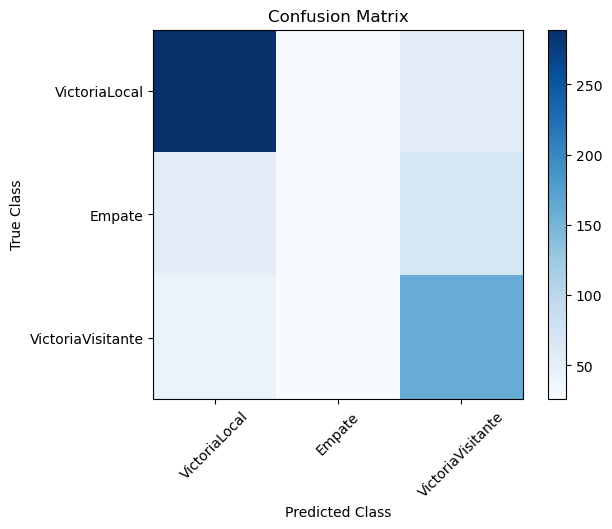

In [383]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Generar predicciones
class_probabilities = model.predict(X_test)
predictions = np.argmax(class_probabilities, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Visualizar la matriz de confusión
plt.imshow(conf_matrix, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(y.columns))
plt.xticks(tick_marks, y.columns, rotation=45)
plt.yticks(tick_marks, y.columns)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()


In [384]:
'''#Obtener los pesos de la primera capa densa
first_layer_weights = model.layers[0].get_weights()[0]

# Obtener los nombres de las características
feature_names = list(X.columns)

# Calcular la importancia promedio de las características
average_weights = np.mean(np.abs(first_layer_weights), axis=1)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_names, average_weights)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Neural Network with Adam Optimizer')
plt.show()'''


"#Obtener los pesos de la primera capa densa\nfirst_layer_weights = model.layers[0].get_weights()[0]\n\n# Obtener los nombres de las características\nfeature_names = list(X.columns)\n\n# Calcular la importancia promedio de las características\naverage_weights = np.mean(np.abs(first_layer_weights), axis=1)\n\n# Visualizar la importancia de las características\nplt.figure(figsize=(10, 6))\nplt.barh(feature_names, average_weights)\nplt.xlabel('Importance')\nplt.ylabel('Feature')\nplt.title('Feature Importance in Neural Network with Adam Optimizer')\nplt.show()"

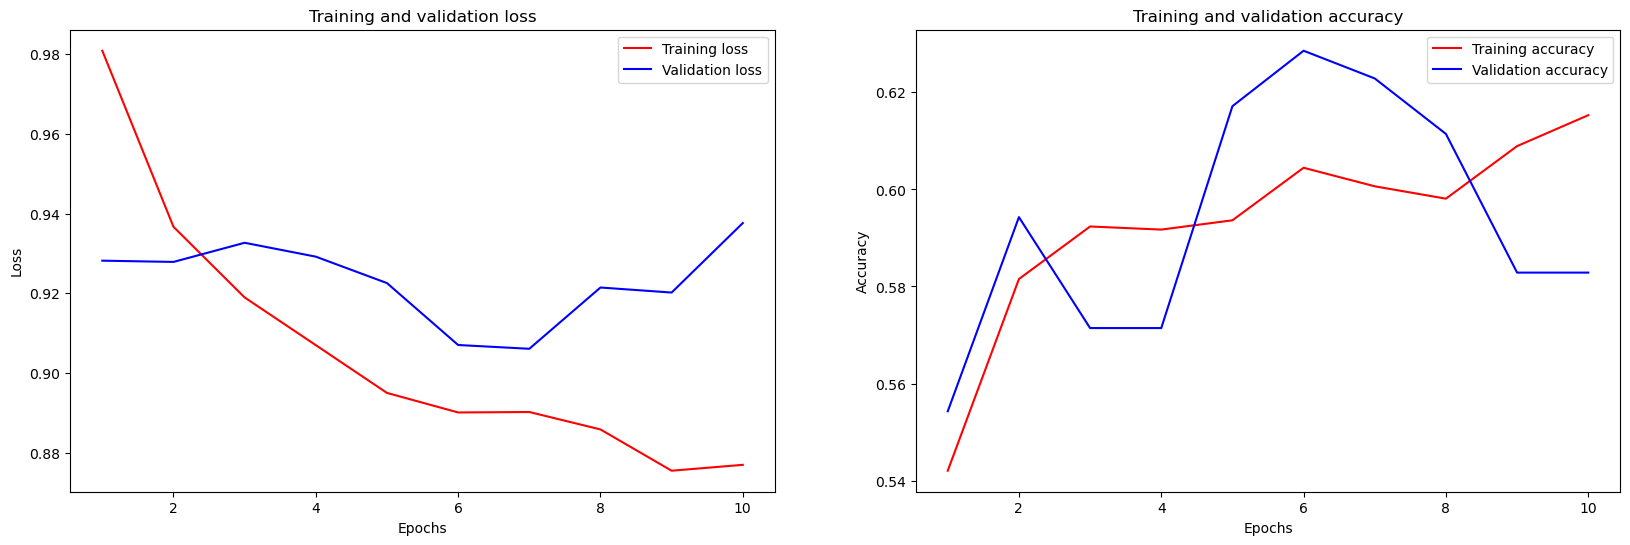

In [385]:
import matplotlib.pyplot as plt

def plot_learning_curve_tf(history):
    """
    Función para visualizar las curvas de aprendizaje de un modelo TensorFlow.
    
    Parameters:
        history: El objeto history devuelto por el método fit del modelo de TensorFlow.
    """
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    epochs = range(1, len(train_loss) + 1)
    
    plt.figure(figsize=(20, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracy, 'r', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()

# Utiliza la función plot_learning_curve_tf con el historial de entrenamiento de tu modelo
plot_learning_curve_tf(history)



In [392]:
# Guardar el modelo
tf.keras.models.save_model(model, 'modelos/modelo_redes_CNN.keras')


AttributeError: 'History' object has no attribute 'built'

In [387]:
model = tf.keras.models.load_model("modelos/modelo_redes_CNN.keras")

In [388]:
import pandas as pd

# Cargar los datos
df = pd.read_csv("dataframe/champions_23_24.csv")

df

# Ahora puedes utilizar estas estadísticas para predecir el resultado del partido utilizando tu modelo de red neuronal


,idPartido,Temporada,Ronda,Local,Visitante,Evento,GolesLocal,GolesVisitante,VictoriaLocal,Empate,...,1_MediaJugadores,%_2_G_Temporada,%_2_G_Temporada_L,%_2_E_Temporada_L,%_2_P_Temporada_L,2_Media_G,2_Media_G_Local,2_Media_Goles_PP,2_ValorJugadores,2_MediaJugadores
0,1,2023-01-01,Group stage,2,307,Stadio Giuseppe Meazza,0,0,0,1,...,16.423147,20.00,33.33,0.00,66.67,0.20,0.33,1.20,385.648621,16.767331
1,2,2023-01-01,Group stage,67,68,Stadion Wankdorf,1,3,0,0,...,15.543811,42.86,50.00,0.00,50.00,0.43,0.50,1.57,497.803882,21.643647
2,3,2023-01-01,Group stage,16,20,Etihad Stadium,3,1,1,0,...,23.287028,0.00,0.00,33.33,66.67,0.00,0.00,1.20,374.821246,17.037329
3,4,2023-01-01,Group stage,28,14,Parc des Princes,2,0,1,0,...,26.475023,44.44,40.00,60.00,0.00,0.44,0.40,1.11,501.021450,21.783541
4,5,2023-01-01,Group stage,99,24,Stadio Olimpico,1,1,0,1,...,24.959872,44.44,60.00,20.00,20.00,0.44,0.60,2.00,550.408580,25.018572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,116,2023-01-01,Quarter-finals,28,5,Parc des Princes,0,0,0,1,...,26.475023,55.56,80.00,20.00,0.00,0.56,0.80,1.78,556.384065,22.255363
116,117,2023-01-01,Quarter-finals,5,28,Estadi Olímpic Lluís Companys,0,0,0,1,...,22.255363,44.44,60.00,40.00,0.00,0.44,0.60,1.44,555.975485,26.475023
117,118,2023-01-01,Quarter-finals,14,24,Signal Iduna Park,0,0,0,1,...,21.783541,44.44,60.00,20.00,20.00,0.44,0.60,2.11,550.408580,25.018572
118,119,2023-01-01,Quarter-finals,16,1,Etihad Stadium,0,0,0,1,...,23.287028,77.78,60.00,40.00,0.00,0.78,0.60,2.00,549.336057,26.158860


In [389]:
# 1. Pedir al usuario que ingrese el equipo local
print("Seleccione el equipo local:")
equipos_disponibles = df['Local'].unique()
equipos_disponibles

equipo_local = int(input("Ingrese el nombre del equipo local: "))
equipo_visitante = int(input("Ingrese el nombre del equipo visitante: "))


# Filtrar el DataFrame para obtener la última fila donde el equipo local y visitante coincidan con los ingresados por el usuario
filtro_ultimo_partido = ((df['Local'] == equipo_local) & (df['Visitante'] == equipo_visitante)) | ((df['Local'] == equipo_visitante) & (df['Visitante'] == equipo_local))

# Obtener el último partido entre los equipos ingresados por el usuario
ultimo_partido_entre_equipos = df[filtro_ultimo_partido].iloc[-1]

# Obtener los valores para las columnas %_Victorias_Local, %_Empate, %_Victoria_Visitante
valores_prediccion = ultimo_partido_entre_equipos[['%_Victorias_Local', '%_Empate', '%_Victoria_Visitante']]

if ultimo_partido_entre_equipos['Local'] == equipo_local and ultimo_partido_entre_equipos['Visitante'] == equipo_visitante:
    porcentajes_de_los_dos = ultimo_partido_entre_equipos[['%_Equipo1_Ganado', '%_Equipo2_Ganado']]

elif ultimo_partido_entre_equipos['Local'] == equipo_visitante and ultimo_partido_entre_equipos['Visitante'] == equipo_local:
    porcentajes_de_los_dos = ultimo_partido_entre_equipos[['%_Equipo1_Ganado', '%_Equipo2_Ganado']]
    porcentajes_de_los_dos.column = ['%_Equipo2_Ganado', '%_Equipo1_Ganado']


# 3. Filtrar el DataFrame para obtener las estadísticas del equipo local
filtro_local = (df['Local'] == equipo_local) | (df['Visitante'] == equipo_local)
ultima_aparicion_local = df[filtro_local].iloc[-1]
if ultima_aparicion_local['Local'] == equipo_local:
    estadisticas_equipo_local = ultima_aparicion_local[['%_1_G_Temporada', '%_1_G_Temporada_L', '%_1_E_Temporada_L', '%_1_P_Temporada_L', '1_Media_G', '1_Media_G_Local', '1_Media_Goles_PP', '1_ValorJugadores', '1_MediaJugadores']]
else:
    estadisticas_equipo_local = ultima_aparicion_local[['%_2_G_Temporada', '%_2_G_Temporada_L', '%_2_E_Temporada_L', '%_2_P_Temporada_L', '2_Media_G', '2_Media_G_Local', '2_Media_Goles_PP', '2_ValorJugadores', '2_MediaJugadores']]
    #Cambiar el numero del nombre de las columnas porque si es el local del usuario pasara a ser las columnas con 1 en vez de 2
    estadisticas_equipo_local.columns = ['%_1_G_Temporada', '%_1_G_Temporada_L', '%_1_E_Temporada_L', '%_1_P_Temporada_L', '1_Media_G', '1_Media_G_Local', '1_Media_Goles_PP', '1_ValorJugadores', '1_MediaJugadores']

# 4. Filtrar el DataFrame para obtener las estadísticas del equipo visitante
filtro_visitante = (df['Local'] == equipo_visitante) | (df['Visitante'] == equipo_visitante)
ultima_aparicion_visitante = df[filtro_visitante].iloc[-1]
if ultima_aparicion_visitante['Local'] == equipo_visitante:
    estadisticas_equipo_visitante = ultima_aparicion_visitante[['%_1_G_Temporada', '%_1_G_Temporada_L', '%_1_E_Temporada_L', '%_1_P_Temporada_L', '1_Media_G', '1_Media_G_Local', '1_Media_Goles_PP', '1_ValorJugadores', '1_MediaJugadores']]
    #Cambiar el numero del nombre de las columnas porque si es el visitante del usuario pasara a ser las columnas con 2 en vez de 1
    estadisticas_equipo_local.columns = ['%_2_G_Temporada', '%_2_G_Temporada_L', '%_2_E_Temporada_L', '%_2_P_Temporada_L', '2_Media_G', '2_Media_G_Local', '2_Media_Goles_PP', '2_ValorJugadores', '2_MediaJugadores']
else:
    estadisticas_equipo_visitante = ultima_aparicion_visitante[['%_2_G_Temporada', '%_2_G_Temporada_L', '%_2_E_Temporada_L', '%_2_P_Temporada_L', '2_Media_G', '2_Media_G_Local', '2_Media_Goles_PP', '2_ValorJugadores', '2_MediaJugadores']]



# Combinar las estadísticas de ambos equipos para predecir el resultado del partido
datos_partido = pd.concat([estadisticas_equipo_local, estadisticas_equipo_visitante, valores_prediccion, porcentajes_de_los_dos])


datos_partido


Seleccione el equipo local:


%_2_G_Temporada              77.78
%_2_G_Temporada_L             60.0
%_2_E_Temporada_L             40.0
%_2_P_Temporada_L              0.0
2_Media_G                     0.78
2_Media_G_Local                0.6
2_Media_Goles_PP               2.0
2_ValorJugadores        549.336057
2_MediaJugadores          26.15886
%_1_G_Temporada              88.89
%_1_G_Temporada_L            100.0
%_1_E_Temporada_L              0.0
%_1_P_Temporada_L              0.0
1_Media_G                     0.89
1_Media_G_Local                1.0
1_Media_Goles_PP              2.67
1_ValorJugadores        582.175689
1_MediaJugadores         23.287028
%_Victorias_Local            54.55
%_Empate                     36.36
%_Victoria_Visitante          9.09
%_Equipo1_Ganado             36.36
%_Equipo2_Ganado             27.27
Name: 118, dtype: object

In [390]:
# Crear un nuevo DataFrame vacío con las columnas especificadas en el orden deseado
nuevo_dataframe = pd.DataFrame(columns=['Local', 'Visitante', '%_Victorias_Local', '%_Empate', '%_Victoria_Visitante',
                                         '%_Equipo1_Ganado', '%_Equipo2_Ganado', '%_1_G_Temporada', '%_1_G_Temporada_L',
                                         '%_1_E_Temporada_L', '%_1_P_Temporada_L', '1_Media_G', '1_Media_G_Local', '1_Media_Goles_PP',
                                         '1_ValorJugadores', '1_MediaJugadores', '%_2_G_Temporada', '%_2_G_Temporada_L',
                                         '%_2_E_Temporada_L', '%_2_P_Temporada_L', '2_Media_G', '2_Media_G_Local', '2_Media_Goles_PP',
                                         '2_ValorJugadores', '2_MediaJugadores'])

# Agregar una fila con los valores proporcionados al nuevo DataFrame
nuevo_dataframe.loc[0] = [equipo_local, equipo_visitante, datos_partido['%_Victorias_Local'], datos_partido['%_Empate'],
                          datos_partido['%_Victoria_Visitante'], datos_partido['%_Equipo1_Ganado'], datos_partido['%_Equipo2_Ganado'],
                          datos_partido['%_1_G_Temporada'], datos_partido['%_1_G_Temporada_L'], datos_partido['%_1_E_Temporada_L'],
                          datos_partido['%_1_P_Temporada_L'], datos_partido['1_Media_G'], datos_partido['1_Media_G_Local'],
                          datos_partido['1_Media_Goles_PP'], datos_partido['1_ValorJugadores'], datos_partido['1_MediaJugadores'],
                          datos_partido['%_2_G_Temporada'], datos_partido['%_2_G_Temporada_L'], datos_partido['%_2_E_Temporada_L'],
                          datos_partido['%_2_P_Temporada_L'], datos_partido['2_Media_G'], datos_partido['2_Media_G_Local'],
                          datos_partido['2_Media_Goles_PP'], datos_partido['2_ValorJugadores'], datos_partido['2_MediaJugadores']]

# Mostrar el nuevo DataFrame
nuevo_dataframe


,Local,Visitante,%_Victorias_Local,%_Empate,%_Victoria_Visitante,%_Equipo1_Ganado,%_Equipo2_Ganado,%_1_G_Temporada,%_1_G_Temporada_L,%_1_E_Temporada_L,...,1_MediaJugadores,%_2_G_Temporada,%_2_G_Temporada_L,%_2_E_Temporada_L,%_2_P_Temporada_L,2_Media_G,2_Media_G_Local,2_Media_Goles_PP,2_ValorJugadores,2_MediaJugadores
0,1.0,16.0,54.55,36.36,9.09,36.36,27.27,88.89,100.0,0.0,...,23.287028,77.78,60.0,40.0,0.0,0.78,0.6,2.0,549.336057,26.15886


In [391]:
# Escalar características del nuevo DataFrame
X_prediccion = nuevo_dataframe

# Realizar predicciones con el modelo
class_probabilities_prediccion = model.predict(X_prediccion)

# Imprimir las probabilidades de clase predichas
print("Probabilidades de clase predichas:")
for i, prob in enumerate(class_probabilities_prediccion[0]):
    print(f"{y.columns[i]}: {prob:.3f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Probabilidades de clase predichas:
VictoriaLocal: 1.000
Empate: 0.000
VictoriaVisitante: 0.000
